# US election result prediction using twitter sentiment analysis

By Ragib Shahriar

## 1.0 What is sentiment analysis?

Sentiment analysis (or opinion mining) uses natural language processing and machine learning to interpret and classify emotions in subjective data. Sentiment analysis is often used in business to detect sentiment in social data, gauge brand reputation, and understand customers.
(Credit: [monkeylearn.com](https://monkeylearn.com/sentiment-analysis) )

### 1.1 Introduction

Using **social media** for political discourse is becoming common
practice, especially around election time. One interesting aspect of
this trend is the possibility of pulsing the public’s opinion about the
elections, and that has attracted the interest of many researchers and
the press, For example the successful in the US Presidential campaign of Barak Obama has established on social network as integral
part of the political camping toolbox.

In the political field, sentiment analysis is used to keep track of regions where the candidate is favourable and work towards regions where the candidate is not favourable in order to improve their chances in an election.

### 1.2 Goals

We want to find out the public mood and opinion in different US states towards the candidates - Republican current president <b>Donald Trump</b> and Democratic challenger <b>Joe Biden</b>.

### 1.3 Identify data sources

I collected the data from **twitter.com**

#### Getting Started: Load libraries and set options

In [1]:
import pandas as pd

#### Load Dataset

In [2]:
data = pd.read_csv('datasets/tweets_location.csv', engine='python')

# make a copy
df = data.copy()
df.head(10)

,text,user,location,Subject,state
0,After the confrontation that cost Walter Wall...,wheresestela1,New Jersey,Donald Trump,New Jersey
1,"""COVID-19 is still raging. Trump is still lyi...",TheFemaleYungin,"The Wrong Address, Texas",Donald Trump,Texas
2,"Donald Trump Jr.: ""Why aren't they talking ab...",KathrynTomashu1,"Northborough, MA",Donald Trump,Massachusetts
3,Letâ??s not forget who created these problems....,ajserino,"New Jersey, USA",Donald Trump,New Jersey
4,There is no greater supporter of Donald Trump...,SpeakBravely,"Twin Cities, Minnesota",Donald Trump,Minnesota
5,'A vote for Donald Trump is a vote against the...,TMScarletFire,"Salem, MA",Donald Trump,Massachusetts
6,There is no greater supporter of Donald Trump...,mwamsley5,Ohio,Donald Trump,Ohio
7,The same people who are outraged at AOC for s...,SpeakBravely,"Twin Cities, Minnesota",Donald Trump,Minnesota
8,Donald Trump is on track to become the worst ...,XchargerFan619,"San Diego, CA",Donald Trump,California
9,"It is Friday, October 30, 2020. One citizen, I...",eachlifeinplace,Iowa,Donald Trump,Iowa


#### Inspecting the data


The first step is to visually inspect the new data set. There are multiple ways to achieve this:

- The easiest being to request the first few records using the DataFrame data.head()* method. By default, “data.head()” returns the first 5 rows from the DataFrame object df (excluding the header row).
- Alternatively, one can also use “df.tail()” to return the five rows of the data frame.
- For both head and tail methods, there is an option to specify the number of records by including the required number in between the parentheses when calling either method.Inspecting the data

In [3]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Ragib\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
sia = SentimentIntensityAnalyzer()

## 2.0 Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5553 entries, 0 to 5552
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      5553 non-null   object
 1   user      5553 non-null   object
 2   location  5553 non-null   object
 3   Subject   5553 non-null   object
 4   state     5553 non-null   object
dtypes: object(5)
memory usage: 217.0+ KB


In [6]:
df.shape

(5553, 5)

There are 5 *columns* and 5553 *rows*

In [7]:
df.isnull().sum()

text        0
user        0
location    0
Subject     0
state       0
dtype: int64

There are no **missing values** in the dataset

Now we will split the dataset into two parts, tweets which mentioned Trump and tweets which mentioned Biden

In [8]:
tweets_trump = df[df.Subject == 'Donald Trump']
tweets_biden = df[df.Subject == 'Joe Biden']

In [9]:
tweets_trump.head()

,text,user,location,Subject,state
0,After the confrontation that cost Walter Wall...,wheresestela1,New Jersey,Donald Trump,New Jersey
1,"""COVID-19 is still raging. Trump is still lyi...",TheFemaleYungin,"The Wrong Address, Texas",Donald Trump,Texas
2,"Donald Trump Jr.: ""Why aren't they talking ab...",KathrynTomashu1,"Northborough, MA",Donald Trump,Massachusetts
3,Letâ??s not forget who created these problems....,ajserino,"New Jersey, USA",Donald Trump,New Jersey
4,There is no greater supporter of Donald Trump...,SpeakBravely,"Twin Cities, Minnesota",Donald Trump,Minnesota


In [10]:
subject_trump = tweets_trump['Subject'].count()
subject_trump

2928

In [11]:
subject_biden = tweets_biden['Subject'].count()
subject_biden

2625

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

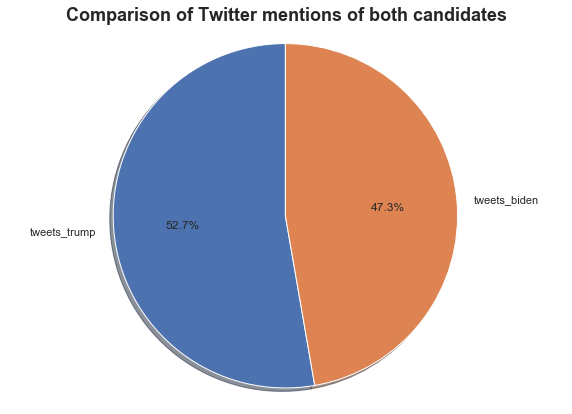

In [13]:
labels = ['tweets_trump', 'tweets_biden']
sizes  = [subject_trump, subject_biden]

# Creating plot 
fig = plt.figure(figsize =(10, 7)) 
plt.pie(sizes, labels = labels,autopct='%1.1f%%',
        shadow=True, startangle=90) 

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Comparison of Twitter mentions of both candidates",fontweight="bold", fontsize=18);
# show plot 
plt.show()

2928 tweets(52.7%) was mentioned trump and 2625(47.3%) tweets was mentioned biden

In [14]:
def sentimentVerdict(sentiment):
  if sentiment['compound'] >= 0.05:
    return "Positive"
  elif sentiment['compound'] <= -0.05:
    return "Negative"
  else:
    return "Neutral"

In [15]:
tweets_trump['sentiment'] = tweets_trump['text'].apply(lambda x: sia.polarity_scores(x))
tweets_biden['sentiment'] = tweets_biden['text'].apply(lambda x: sia.polarity_scores(x))

C:\Users\Ragib\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Ragib\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
tweets_trump['sentiment_overall'] = tweets_trump['sentiment'].apply(lambda x: sentimentVerdict(x))
tweets_trump.head(10)

C:\Users\Ragib\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,user,location,Subject,state,sentiment,sentiment_overall
0,After the confrontation that cost Walter Wall...,wheresestela1,New Jersey,Donald Trump,New Jersey,"{'neg': 0.181, 'neu': 0.819, 'pos': 0.0, 'comp...",Negative
1,"""COVID-19 is still raging. Trump is still lyi...",TheFemaleYungin,"The Wrong Address, Texas",Donald Trump,Texas,"{'neg': 0.327, 'neu': 0.673, 'pos': 0.0, 'comp...",Negative
2,"Donald Trump Jr.: ""Why aren't they talking ab...",KathrynTomashu1,"Northborough, MA",Donald Trump,Massachusetts,"{'neg': 0.0, 'neu': 0.92, 'pos': 0.08, 'compou...",Positive
3,Letâ??s not forget who created these problems....,ajserino,"New Jersey, USA",Donald Trump,New Jersey,"{'neg': 0.265, 'neu': 0.555, 'pos': 0.18, 'com...",Negative
4,There is no greater supporter of Donald Trump...,SpeakBravely,"Twin Cities, Minnesota",Donald Trump,Minnesota,"{'neg': 0.169, 'neu': 0.654, 'pos': 0.177, 'co...",Positive
5,'A vote for Donald Trump is a vote against the...,TMScarletFire,"Salem, MA",Donald Trump,Massachusetts,"{'neg': 0.0, 'neu': 0.896, 'pos': 0.104, 'comp...",Positive
6,There is no greater supporter of Donald Trump...,mwamsley5,Ohio,Donald Trump,Ohio,"{'neg': 0.169, 'neu': 0.654, 'pos': 0.177, 'co...",Positive
7,The same people who are outraged at AOC for s...,SpeakBravely,"Twin Cities, Minnesota",Donald Trump,Minnesota,"{'neg': 0.299, 'neu': 0.613, 'pos': 0.088, 'co...",Negative
8,Donald Trump is on track to become the worst ...,XchargerFan619,"San Diego, CA",Donald Trump,California,"{'neg': 0.227, 'neu': 0.773, 'pos': 0.0, 'comp...",Negative
9,"It is Friday, October 30, 2020. One citizen, I...",eachlifeinplace,Iowa,Donald Trump,Iowa,"{'neg': 0.0, 'neu': 0.93, 'pos': 0.07, 'compou...",Positive


In [17]:
tweets_biden['sentiment_overall'] = tweets_biden['sentiment'].apply(lambda x: sentimentVerdict(x))
tweets_biden.head(10)

C:\Users\Ragib\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,user,location,Subject,state,sentiment,sentiment_overall
2928,Unfortunately she along with other politicia...,gmollo1115,"Georgia, USA",Joe Biden,Georgia,"{'neg': 0.341, 'neu': 0.659, 'pos': 0.0, 'comp...",Negative
2929,Letâ??s talk about the Hunter laptop and such...,mcritter61,"Houston, TX",Joe Biden,Texas,"{'neg': 0.186, 'neu': 0.723, 'pos': 0.092, 'co...",Negative
2930,Fun to think about how we learned today that ...,1kingsbay,"on the river, FL",Joe Biden,Florida,"{'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'comp...",Positive
2931,Larry Kudlow: Joe Biden's economic plan would...,JanedgeJanis,"Texas, USA",Joe Biden,Texas,"{'neg': 0.127, 'neu': 0.873, 'pos': 0.0, 'comp...",Negative
2932,A 64-page document asserting an elaborate con...,denopotter,"Dallas, TX",Joe Biden,Texas,"{'neg': 0.159, 'neu': 0.841, 'pos': 0.0, 'comp...",Negative
2933,He is a profoundly decent man: a man of faith...,afquillen,"Crossville, Tennessee",Joe Biden,Tennessee,"{'neg': 0.0, 'neu': 0.669, 'pos': 0.331, 'comp...",Positive
2934,"Every CNN show should end with ""I'm Joe Biden...",sistertoldjah,"Charlotte, North Carolina",Joe Biden,North Carolina,"{'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'comp...",Positive
2935,"Rest assured, thatâ??s my best friend who wr...",JFJMayer8,"Oregon, USA",Joe Biden,Oregon,"{'neg': 0.0, 'neu': 0.563, 'pos': 0.437, 'comp...",Positive
2936,"Winston Churchillâ??s granddaughter, Edwina S...",jerryChromeX,"Texas, USA",Joe Biden,Texas,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
2937,If Sleepy Joe Biden is actually elected Presi...,weisarts,"San Francisco, CA",Joe Biden,California,"{'neg': 0.112, 'neu': 0.717, 'pos': 0.17, 'com...",Positive


In [18]:
tweets_trump_location = tweets_trump.groupby(['state', 'sentiment_overall']).count()
tweets_trump_location = tweets_trump_location['user']
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(tweets_trump_location)

state           sentiment_overall
Alabama         Negative               4
                Neutral                3
                Positive               7
Alaska          Neutral                1
                Positive               2
Arizona         Negative              18
                Neutral               19
                Positive              20
Arkansas        Negative               6
                Neutral               12
                Positive              11
California      Negative              90
                Neutral               48
                Positive              87
Colorado        Negative              14
                Neutral                9
                Positive              19
Connecticut     Negative              19
                Neutral               17
                Positive              16
Delaware        Negative               4
                Neutral                6
                Positive               4
Florida         Negativ

In [19]:
tweets_biden_location = tweets_biden.groupby(['state', 'sentiment_overall']).count()
tweets_biden_location = tweets_biden_location['user']
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(tweets_biden_location)

state           sentiment_overall
Alabama         Negative              10
                Neutral                9
                Positive               6
Alaska          Negative               2
                Neutral                1
                Positive               2
Arizona         Negative              24
                Neutral               18
                Positive              27
Arkansas        Negative               3
                Neutral                4
                Positive               5
California      Negative             115
                Neutral               67
                Positive              88
Colorado        Negative              17
                Neutral               13
                Positive              18
Connecticut     Negative              13
                Neutral               11
                Positive              10
Delaware        Negative               4
                Neutral                3
                Positiv

In [20]:
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii',
          'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
          'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New York', 'New Mexico', 'North Carolina',
          'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
          'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

In [21]:
tweets_location_df = pd.DataFrame({'State': [state for state in states],
                                         'Trump Positive': [0 for state in states],
                                         'Trump Negative': [0 for state in states],
                                         'Trump Neutral': [0 for state in states],
                                         'Trump Total': [0 for state in states],
                                         'Biden Positive': [0 for state in states],
                                         'Biden Negative': [0 for state in states],
                                         'Biden Neutral': [0 for state in states],
                                         'Biden Total': [0 for state in states]})
tweets_location_df.set_index('State', inplace = True)
for state in states:
  positiveTrump, negativeTrump, neutralTrump, positiveBiden, negativeBiden, neutralBiden = 0, 0, 0, 0, 0, 0
  try:
    positiveTrump = tweets_trump_location[state]['Positive']
  except:
    positiveTrump = 0
  
  try:
    negativeTrump = tweets_trump_location[state]['Negative']
  except:
    negativeTrump = 0
  
  try:
    neutralTrump = tweets_trump_location[state]['Neutral']
  except:
    neutralTrump = 0
  
  try:
    positiveBiden = tweets_biden_location[state]['Positive']
  except:
    positiveBiden = 0
  
  try:
    negativeBiden = tweets_biden_location[state]['Negative']
  except:
    negativeBiden = 0
  
  try:
    neutralBiden = tweets_biden_location[state]['Neutral']
  except:
    neutralBiden = 0

  totalTrump = positiveTrump + negativeTrump + neutralTrump
  totalBiden = positiveBiden + negativeBiden + neutralBiden

  if totalTrump == 0:
    tweets_location_df.at[state, 'Trump Positive'], tweets_location_df.at[state, 'Trump Negative'], tweets_location_df.at[state, 'Trump Neutral'] = 0,0,0
  else:
    tweets_location_df.at[state, 'Trump Positive'] = round((positiveTrump/totalTrump)*100.0)
    tweets_location_df.at[state, 'Trump Negative'] = round((negativeTrump/totalTrump)*100.0)
    tweets_location_df.at[state, 'Trump Neutral'] = round((neutralTrump/totalTrump)*100.0)
  tweets_location_df.at[state, 'Trump Total'] = totalTrump
  
  if totalBiden == 0:
    tweets_location_df.at[state, 'Biden Positive'], tweets_location_df.at[state, 'Biden Negative'], tweets_location_df.at[state, 'Biden Neutral'] = 0,0,0
  else:
    tweets_location_df.at[state, 'Biden Positive'] = round((positiveBiden/totalBiden)*100.0)
    tweets_location_df.at[state, 'Biden Negative'] = round((negativeBiden/totalBiden)*100.0)
    tweets_location_df.at[state, 'Biden Neutral'] = round((neutralBiden/totalBiden)*100.0)
  tweets_location_df.at[state, 'Biden Total'] = totalBiden
tweets_location_df

,Trump Positive,Trump Negative,Trump Neutral,Trump Total,Biden Positive,Biden Negative,Biden Neutral,Biden Total
State,,,,,,,,
Alabama,50,29,21,14,24,40,36,25
Alaska,67,0,33,3,40,40,20,5
Arizona,35,32,33,57,39,35,26,69
Arkansas,38,21,41,29,42,25,33,12
California,39,40,21,225,33,43,25,270
Colorado,45,33,21,42,38,35,27,48
Connecticut,31,37,33,52,29,38,32,34
Delaware,29,29,43,14,30,40,30,10
Florida,37,35,28,378,33,31,36,232


In [22]:
tweets_location_df['Predicted Judgement'] = 'Neutral'
for index, row in tweets_location_df.iterrows():
  if row['Trump Total'] <= 15 and row['Biden Total'] <= 15:
    tweets_location_df.loc[index, 'Predicted Judgement'] = 'Insufficient Data'
  else:
    if row['Trump Positive'] > row['Biden Positive'] and (row['Trump Negative'] < row['Biden Negative'] or row['Trump Neutral'] > row['Biden Neutral']):
      tweets_location_df.loc[index, 'Predicted Judgement'] = 'Strongly Republican'
    elif row['Biden Positive'] > row['Trump Positive'] and (row['Biden Negative'] < row['Trump Negative'] or row['Biden Neutral'] > row['Trump Neutral']):
      tweets_location_df.loc[index, 'Predicted Judgement'] = 'Strongly Democratic'
    elif row['Trump Positive'] - row['Biden Positive'] > row['Biden Negative'] - row['Trump Negative']:
      tweets_location_df.loc[index, 'Predicted Judgement'] = 'Somewhat Republican'
    elif row['Biden Positive'] - row['Trump Positive'] > row['Trump Negative'] - row['Biden Negative']:
      tweets_location_df.loc[index, 'Predicted Judgement'] = 'Somewhat Democratic'
tweets_location_df = tweets_location_df.rename(columns={'Trump Positive': 'Trump Positive (in %)', 
                                                        'Trump Negative': 'Trump Negative (in %)',
                                                        'Trump Neutral': 'Trump Neutral (in %)',
                                                        'Trump Total': 'Trump Total Mentions',
                                                        'Biden Positive': 'Biden Positive (in %)',
                                                        'Biden Negative': 'Biden Negative (in %)',
                                                        'Biden Neutral': 'Biden Neutral (in %)',
                                                        'Biden Total': 'Biden Total Mentions'})
tweets_location_df

,Trump Positive (in %),Trump Negative (in %),Trump Neutral (in %),Trump Total Mentions,Biden Positive (in %),Biden Negative (in %),Biden Neutral (in %),Biden Total Mentions,Predicted Judgement
State,,,,,,,,,
Alabama,50,29,21,14,24,40,36,25,Strongly Republican
Alaska,67,0,33,3,40,40,20,5,Insufficient Data
Arizona,35,32,33,57,39,35,26,69,Somewhat Democratic
Arkansas,38,21,41,29,42,25,33,12,Somewhat Democratic
California,39,40,21,225,33,43,25,270,Strongly Republican
Colorado,45,33,21,42,38,35,27,48,Strongly Republican
Connecticut,31,37,33,52,29,38,32,34,Strongly Republican
Delaware,29,29,43,14,30,40,30,10,Insufficient Data
Florida,37,35,28,378,33,31,36,232,Somewhat Republican
